In [14]:
import numpy as np

A = np.array(
    [
        [-1, -2, 0, 1, -2, -3],
        [-1, -2, -3, -2, 0, -3],
        [-1, -3, 1, 3, 2, -4],
        [2, 1, -1, 0, -2, 3],
        [0, -3, -1, 2, -1, -3],
        [1, -3, 2, 6, 0, -2],
        [-3, 1, 0, -4, 2, -2],
        [-2, 2, -2, -6, -2, 0],
        [-3, -1, 2, 0, 2, -4],
        [2, -2, 0, 4, -1, 0],
    ]
)
A

array([[-1, -2,  0,  1, -2, -3],
       [-1, -2, -3, -2,  0, -3],
       [-1, -3,  1,  3,  2, -4],
       [ 2,  1, -1,  0, -2,  3],
       [ 0, -3, -1,  2, -1, -3],
       [ 1, -3,  2,  6,  0, -2],
       [-3,  1,  0, -4,  2, -2],
       [-2,  2, -2, -6, -2,  0],
       [-3, -1,  2,  0,  2, -4],
       [ 2, -2,  0,  4, -1,  0]])

In [3]:
m, n = A.shape
print(f"The shape of A is: {(m, n)}.")

The shape of A is: (10, 6).


In [9]:
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)

(10, 10) (6,) (6, 6)


In [11]:
S =  np.zeros((m,n))
S[:n, :n] = np.diag(s)
S

array([[1.32720236e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.03590904e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 6.02367888e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.87366090e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.26568822e-15, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.84596341e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 

## Exercise 1: Compute the numerical rank of $A$

In [35]:
S.shape

(10, 6)

In [28]:
r = np.sum(s > 1e-10)
print(f"The true rank of A is: {np.linalg.matrix_rank(A)}.")
print(f"The computed rank of A is: {r}.")

The true rank of A is: 4.
The computed rank of A is: 4.


## Exercise 2: The $k$-rank approximation

In [56]:
print(min(A.shape))
k = 4

A_k = U[:, :k] @ S[:k, :k] @ VT[:k, :]
print(f"Shape of A_k: {A_k.shape}. Rank of A_k: {np.linalg.matrix_rank(A_k)}.")

print(f"||A - A_k||_2 = {np.linalg.norm(A - A_k, 2)}.")

6
Shape of A_k: (10, 6). Rank of A_k: 4.
||A - A_k||_2 = 5.78098401990518e-15.


## Exercise 3: SVD for Image Compression


Shape of the image: (512, 512).


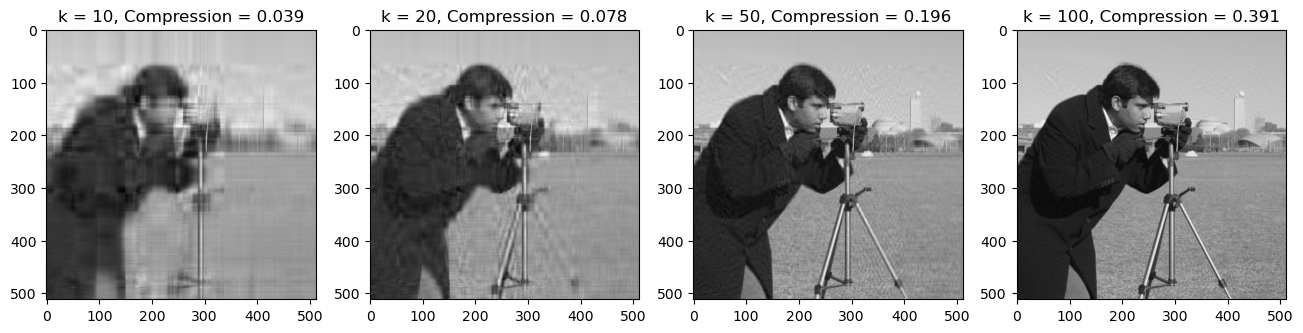

In [36]:
import skimage
import matplotlib.pyplot as plt

X = skimage.data.camera()
m, n = X.shape
print(f"Shape of the image: {m, n}.")

m, n = X.shape

U, S, VT = np.linalg.svd(X, full_matrices=False)

def k_rank_approximation(U, S, VT, k):
    return U[:, :k] @ np.diag(S[:k]) @ VT[:k,:]

def compression_factor(k, m, n):
    return (k * (m + n + 1)) / (m * n)

k_values = [10, 20, 50, 100]
plt.figure(figsize=(16, 8))

for i, k in enumerate(k_values):
    A_k = k_rank_approximation(U, S, VT, k)
    plt.subplot(1, len(k_values), i+1)
    plt.imshow(A_k, cmap='gray')
    plt.title(f"k = {k}, Compression = {compression_factor(k, m, n):.3f}")

plt.show()

In [ ]:
w!